# 01. Import Libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing Data

In [2]:
# Project folder pathway

path = r'C:\Users\SD.DESKTOP-45BHU58\OneDrive\Desktop\CF\Section 4 - Python\Instacart Basket Analysis'

In [5]:
path

'C:\\Users\\SD.DESKTOP-45BHU58\\OneDrive\\Desktop\\CF\\Section 4 - Python\\Instacart Basket Analysis'

In [6]:
# Importing most updated merged data set

ords_prods_custs_merged = pd.read_pickle(r'C:\Users\SD.DESKTOP-45BHU58\OneDrive\Desktop\CF\Section 4 - Python\Instacart Basket Analysis\02 Data\Prepared Data\orders_products_customers_merged.pkl')

In [7]:
# Double checking headers

ords_prods_custs_merged.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


# 03. Directions

### Q2. If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart

### Bar Charts

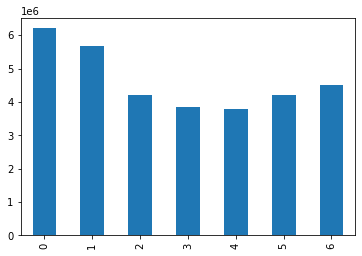

In [8]:
# Create a bar chart - sorted

bar = ords_prods_custs_merged['orders_day_of_the_week'].value_counts().sort_index().plot.bar()

In [9]:
# Exporting bar graph

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

### Histograms & Scatterplots

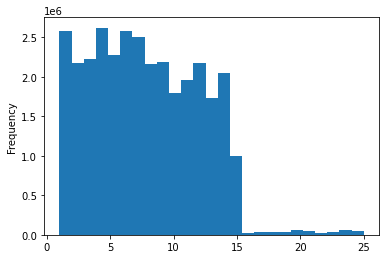

In [11]:
# Creating histogram of the "prices" column

hist = ords_prods_custs_merged['prices'].plot.hist(bins = 25)

Most products are between 1.00 and 15.00. Few are prices at 15.00 to 25.00.

In [12]:
# Exporting histogram

hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'prices_histogram.png'))

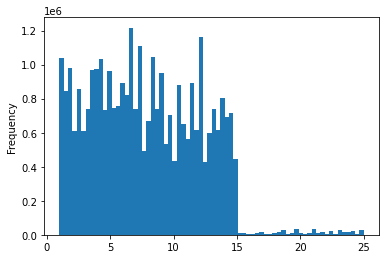

In [13]:
# Creating same histogram with bins set to 70

hist_2 = ords_prods_custs_merged['prices'].plot.hist(bins = 70)

In [14]:
# Exporting hist_2

hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'prices_histogram_2.png'))

<AxesSubplot:xlabel='prices', ylabel='prices'>

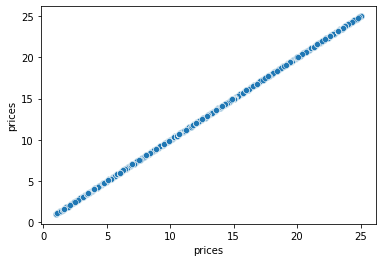

In [15]:
# Creating scatterplot for 'prices'

sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_custs_merged)

### Sampling Data - Line Chart

In [18]:
# Setting seed for the random number generator and creating list holding True/False values to the test np.random.rand() <= 0.7

np.random.seed(4)
dev = np.random.rand(len(ords_prods_custs_merged)) <= 0.7

In [19]:
# Getting a better picture of np.random.rand()

np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [21]:
# Store 70% of sample in the big df

big = ords_prods_custs_merged[dev]

In [22]:
# Store 30% of the sample in small df

small = ords_prods_custs_merged[~dev]

In [23]:
# Double checking length

len(big) + len(small)

32404859

In [24]:
# Reducing sample to only necessary columns

df_2 = small[['orders_day_of_the_week', 'prices']]

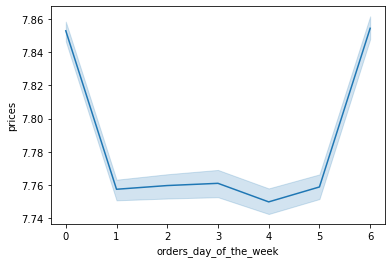

In [25]:
# Creating line chart

line = sns.lineplot(data = df_2, x = 'orders_day_of_the_week', y = 'prices')

Graph looks different than Exercise example due to the sample.

### Q3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

In a markdown cell beneath your histogram, describe what the histogram demonstrates.

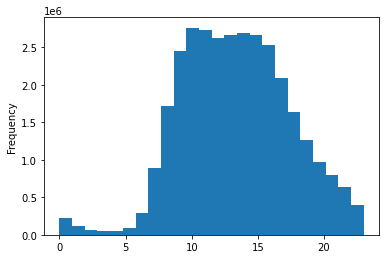

In [26]:
# Creating histogram for 'order_hour_of_day' w/ 24 bins

hist_3 = ords_prods_custs_merged['order_hour_of_day'].plot.hist(bins = 24)

Afternoon times are the most popular hours for orders, especially from 10am-3pm. 7am is when orders start to pickup and they start to decline after 3pm, however, evening hours are also pretty popular.

In [27]:
# Exporting hist_3

hist_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'order_hours_histogram.png'))

### Q4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column

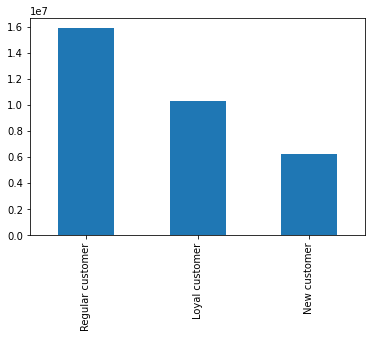

In [30]:
# Bar chart for 'loyalty_flag' column

bar_2 = ords_prods_custs_merged['loyalty_flag'].value_counts().plot.bar()

In [32]:
# Exporting bar_2

bar_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_flag_barchart.png'))

### Q5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [33]:
# Setting seed for the random number generator and creating list holding True/False values to the test np.random.rand() <= 0.7

np.random.seed(4)
dev_2 = np.random.rand(len(ords_prods_custs_merged)) <= 0.7

In [34]:
# Store 70% of sample in the big df

big = ords_prods_custs_merged[dev_2]

In [35]:
# Store 30% of the sample in small df

small = ords_prods_custs_merged[~dev]

In [36]:
# Check length of big + small

len(big) + len(small)

32404859

In [37]:
# Check length of entire df

len(ords_prods_custs_merged)

32404859

In [38]:
# Reducing sample to only necessary columns

df_3 = small[['order_hour_of_day', 'prices']]

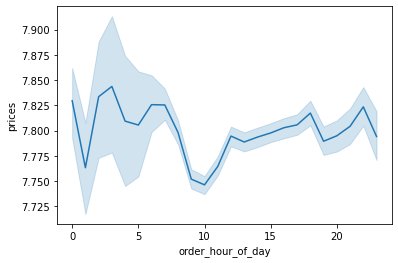

In [39]:
# Creating line graph showing 'order_hour_of_day' and 'prices'

line_2 = sns.lineplot(data = df_3, x = 'order_hour_of_day', y = 'prices')

In [40]:
# Exporting line_2

line_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orderhourofday_and_prices.png'))

### Q6. Determine whether there’s a connection between age and family status by creating a line chart exploring the connections between age and number of dependents:

In a markdown cell beneath your line chart, describe what the line chart shows

In [42]:
# Reducing sample to necessary columns

df_4 = small[['age', 'number_of_dependants']]

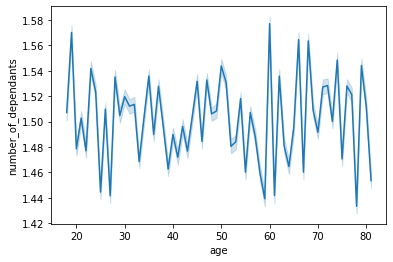

In [43]:
# Creating line graph showing 'age' and 'number_of_dependants'

line_3 = sns.lineplot(data = df_4, x = 'age', y = 'number_of_dependants')

There is no strong connection between age and number of dependants

In [47]:
# Exporting line_3

line_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_numofdependants.png'))

### Q7. You’ll also need to explore whether there’s a connection between age and spending power. To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

In a markdown cell beneath your scatterplot, describe what the scatterplot shows

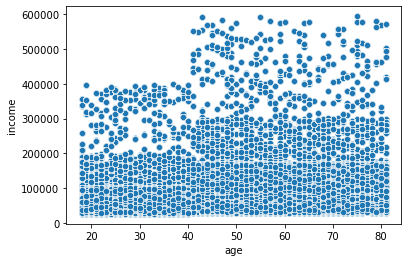

In [45]:
# Creating scatterplot showing relationship between age and spending power

scatter = sns.scatterplot(x = 'age', y = 'income', data = ords_prods_custs_merged)

The spending power for people aged 20-40 is lower in comparison to those aged 40-80. This makes sense since older people are more established in their careers and are likely to earn more due to this, giving them more purchasing power.

In [48]:
# Exporting scatterplot

scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_purchasing_power.png'))